In [7]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv, kv, jn_zeros
from scipy.optimize import fsolve

In [18]:
v = 3
na = 0.22

In [14]:
def gen_eigen_eq_TE():
    
    def wrapper(u):
        w = np.sqrt(v*v-u*u)
        return w * jv(1, u) / jv(0, u) + u * kv(1, w) / kv(0, w)

    return wrapper

In [15]:
def lhs_eigen_eq_TE():
    
    def wrapper(u):
        w = np.sqrt(v*v-u*u)
        return w * jv(1, u) / jv(0, u)

    return wrapper

In [16]:
def rhs_eigen_eq_TE():
  
  def wrapper(u):
    w = np.sqrt(v*v-u*u)
    return -u * kv(1, w) / kv(0, w)

  return wrapper

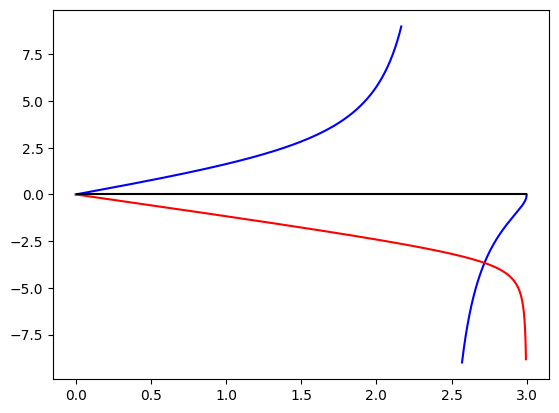

In [19]:
lhs = lhs_eigen_eq_TE()
rhs = rhs_eigen_eq_TE()

delta = 0.00001
u = np.linspace(delta, v-delta, int(v*1000))
lhs = lhs(u)
rhs = rhs(u)

# Limits plot range by setting values over 1.2V as 'None'
plot_limit = 3*v
mlhs = np.where(abs(lhs) >= plot_limit, None, lhs)
mrhs = np.where(abs(rhs) >= plot_limit, None, rhs)

plt.plot(u, mlhs, color='blue') # plot left-side of eigen-value eq.
plt.plot(u, mrhs, color='red')  # plot right-side of eigen-value eq.
plt.hlines(y=0, xmin=0, xmax=v, colors='k') # plot x axis.

# plot diverging assymtotic lines
# max_num = find_max_num_jn_zeors(l, V)
# aymtotic_vertical_lines = jn_zeros(l, max_num) 
# for n in aymtotic_vertical_lines:
#     plt.vlines(x=n, ymin=-plot_limit, ymax=plot_limit, linestyles='dashed', colors='k')